In [1]:
import numpy as np

def _haar_orthogonal(n: int, rng=None) -> np.ndarray:
    """
    Haar-random O(n) via the Mezzadri QR-trick.
    """
    rng = np.random.default_rng(rng)
    Z = rng.standard_normal((n, n))
    Q, R = np.linalg.qr(Z)
    Q *= np.sign(np.diag(R))    # ensure diag(R)>0
    return Q

def kesten_mckay_full(n: int, d: int, rng=None) -> np.ndarray:
    """
    n×n real-symmetric whose spectrum → KM_d (degree d).
    Even d only: sum of m = d//2 independent O + O^T.
    """
    if d % 2:
        raise ValueError("d must be even and ≥2")
    rng = np.random.default_rng(rng)
    m = d // 2
    A = np.zeros((n, n))
    for _ in range(m):
        O = _haar_orthogonal(n, rng)
        A += O + O.T
    return A

In [3]:
n, d = 5000, 2
A = kesten_mckay_full(n, d, rng=42)
eig = np.linalg.eigvalsh(A)   # pure KM_d law on [-2√(d-1), 2√(d-1)]

Plot saved to "/home/sia/work/github/freealg/notebooks/regular_graph_eig.pdf".


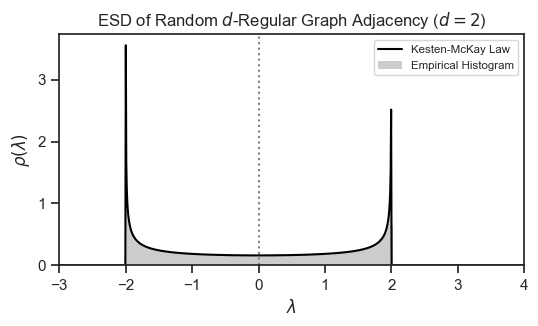

In [4]:
# Plot eigenvalues
# eig = np.load('snap_facebook_eig.npy')
# max_eig = 20.0
# eig_ = eig[np.abs(eig) < max_eig]

# eig = np.load('regular_graph_eig.npy')
# import networkx as nx
# import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt
import texplot
import numpy

bins = np.linspace(int(np.min(eig))-2, int(np.max(eig))+2, 200)

# Exact law
lam_m = -2.0 * np.sqrt(d-1)
lam_p = 2.0 * np.sqrt(d-1)
x = np.linspace(bins[0], bins[-1], 1000)
mask = (x >= lam_m) & (x <= lam_p)
rho = np.zeros_like(x)
rho[mask] = d * np.sqrt(4*(d-1) - x[mask]**2) / (2.0 * np.pi * (d**2 - x[mask]**2))

with texplot.theme(use_latex=False):
        
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.plot(x, rho, color='black', label='Kesten-McKay Law')
    ax.hist(eig, bins=bins, density=True, color='silver', edgecolor='none',
        linewidth=0.5, alpha=0.8, label='Empirical Histogram')
    # ax.plot(bins_c, h, color='firebrick', label='Empirical')
    # ax.fill_between(bins_c, h, facecolor='lightgray')
    ax.axvline(0, linestyle=':', color='gray')
    # ax.set_yscale('log')
    ax.set_xlabel(r'$\lambda$')
    ax.set_ylabel(r'$\rho(\lambda)$')
    ax.set_title(fr'ESD of Random $d$-Regular Graph Adjacency ($d={{{d}}}$)')
    ax.set_xlim([bins[0], bins[-1]])
    ax.set_ylim(bottom=0)
    # ax.set_xlim([-max_eig, max_eig])
    ax.legend(fontsize='x-small')

    texplot.show_or_save_plot(plt, default_filename='regular_graph_eig.pdf',
                              transparent_background=True, dpi=200,
                              show_and_save=True, verbose=True)